## Business Case:
To predict whether a person will have Stroke or not

### Domain Knowledge :
A stroke occurs when there is a disruption in the blood supply to the brain, causing brain cells to die.

Common Features in Stroke Prediction:

Age: Older individuals are at higher risk of stroke.
Gender: Males tend to have a higher risk of stroke, but the outcomes are often more severe in females.
Heart Disease: Those with heart disease are at higher risk of stroke due to factors like blood clots.
Hypertension: Elevated blood pressure is a significant predictor of stroke risk.
Smoking: Smoking accelerates the process of plaque buildup in arteries, contributing to stroke risk.
BMI (Body Mass Index): Obesity is a known contributor to stroke risk, often linked to hypertension and diabetes.
** Underweight: BMI less than 18.5
** Normal weight: BMI between 18.5 and 24.9
** Overweight: BMI between 25 and 29.9
** Obese: BMI 30 or higher
Glucose Level: High blood glucose levels (indicative of diabetes) increase stroke risk.
** Normal Glucose Levels:80–120 mg/dL
** Prediabetes: 110–140 mg/dL.
** Diabetes:140 mg/dL and above
Work Type/Residence: Occupational stress and urban living (with environmental pollution) can be factors in stroke risk.

In [113]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [114]:
data = pd.read_csv('Stroke Prediction.csv')

In [115]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [116]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [118]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [119]:
data.describe(include='O')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [120]:
# EDA

In [121]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<Axes: xlabel='age', ylabel='Count'>

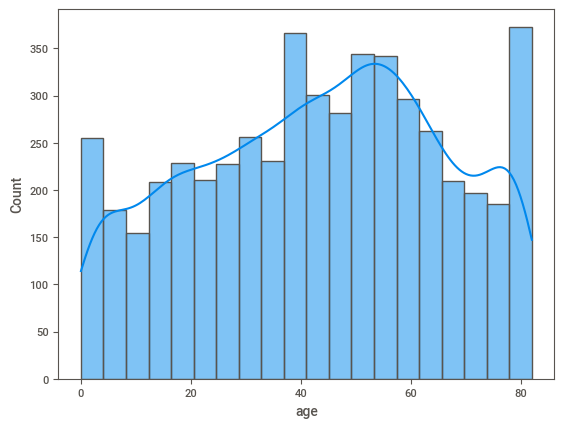

In [122]:
sns.histplot(x='age',kde=True,data=data)

<Axes: xlabel='hypertension', ylabel='Count'>

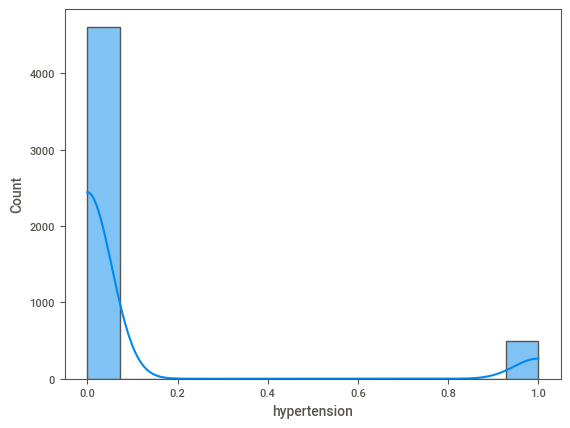

In [123]:
sns.histplot(x='hypertension',kde=True,data=data)

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

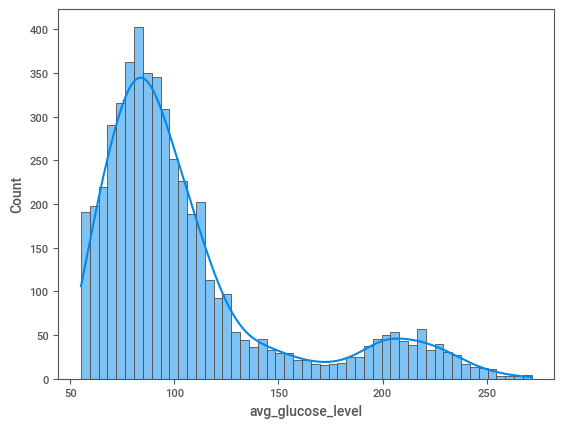

In [124]:
sns.histplot(x='avg_glucose_level',kde=True,data=data)

<Axes: xlabel='bmi', ylabel='Count'>

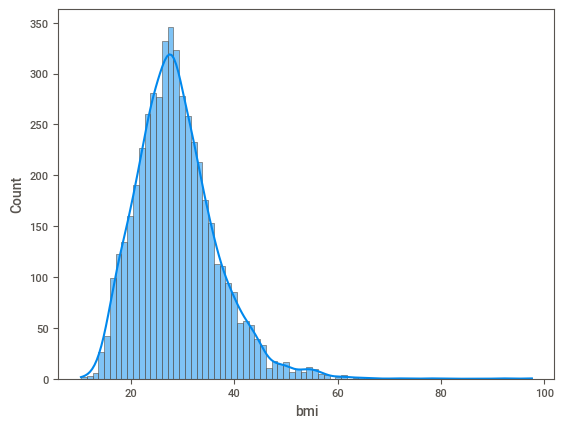

In [125]:
sns.histplot(x='bmi',kde=True,data=data)

<Axes: xlabel='avg_glucose_level', ylabel='bmi'>

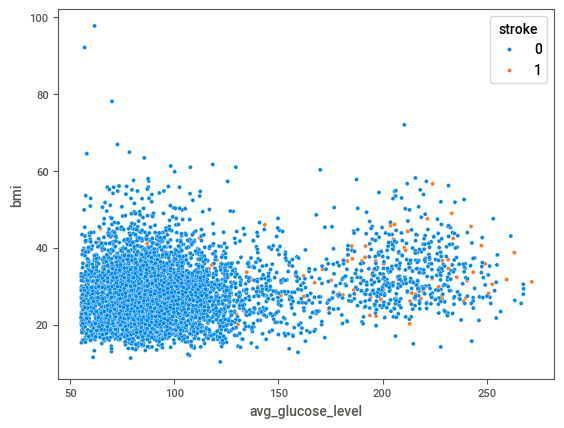

In [126]:
sns.scatterplot(x='avg_glucose_level',y='bmi',hue='stroke',data=data)

In [127]:
# so from here we can say avg_glucose_level more then 150 that person might have a chance of stroke. 
# And avg_glucose_level less then 150 that person might not have a chance of stroke

### Null value handling

In [129]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [130]:
# since bmi column has null values and also it has outliers so it is better to compute null values with median of that column.

In [131]:
data['bmi'].fillna(data['bmi'].median(),inplace=True)

In [132]:
data['bmi'].isnull().sum()

0

### outlier handling 

<Axes: xlabel='avg_glucose_level'>

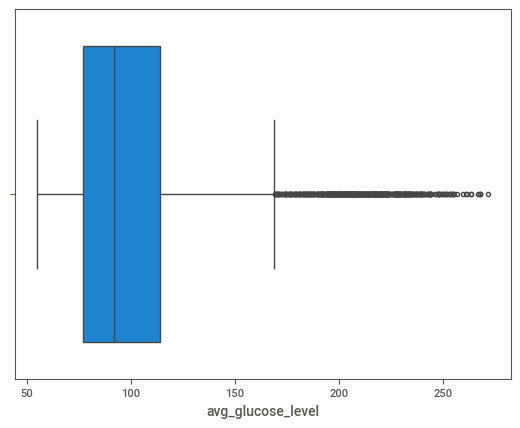

In [134]:
sns.boxplot(x='avg_glucose_level',data=data)

In [135]:
Q1 = data['avg_glucose_level'].quantile(0.25)
Q3 = data['avg_glucose_level'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

36.845


In [136]:
lower_bound = Q1-1.5*IQR
upper_bound= Q3+1.5*IQR
print(lower_bound)
print(upper_bound)

21.977500000000006
169.35750000000002


In [137]:
outliers = data[(data['avg_glucose_level'] < lower_bound) | (data['avg_glucose_level'] > upper_bound)]

num_outlier = len(outliers)
print(num_outlier)

627


In [138]:
data.drop(outliers.index,inplace=True)

<Axes: xlabel='avg_glucose_level'>

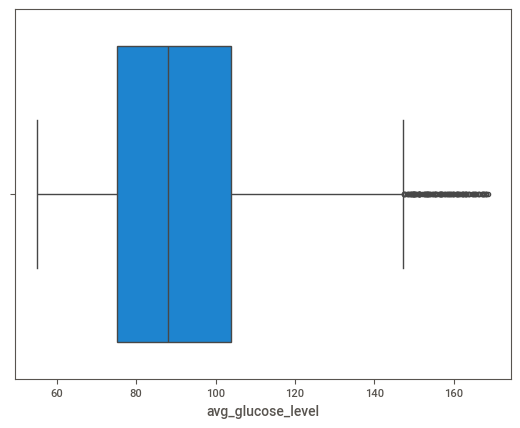

In [139]:
sns.boxplot(x='avg_glucose_level',data=data)

In [140]:
outliers = data[(data['avg_glucose_level'] < lower_bound) | (data['avg_glucose_level'] > upper_bound)]

num_outlier = len(outliers)
print(num_outlier)

0


In [141]:
data.avg_glucose_level = np.sqrt(data.avg_glucose_level)

<Axes: xlabel='avg_glucose_level'>

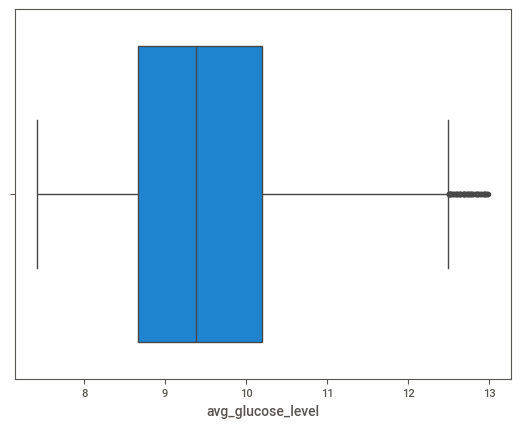

In [142]:
sns.boxplot(x='avg_glucose_level',data=data)

In [143]:
data.avg_glucose_level = np.sqrt(data.avg_glucose_level)

<Axes: xlabel='avg_glucose_level'>

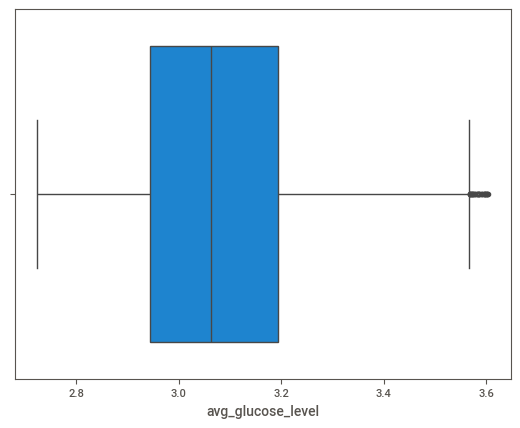

In [144]:
sns.boxplot(x='avg_glucose_level',data=data)

In [145]:
data.avg_glucose_level = np.sqrt(data.avg_glucose_level)

<Axes: xlabel='avg_glucose_level'>

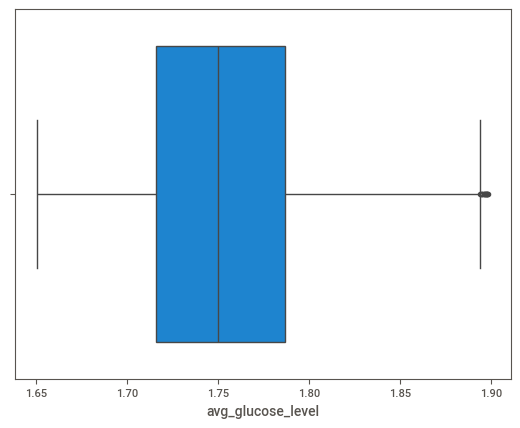

In [146]:
sns.boxplot(x='avg_glucose_level',data=data)

In [147]:
data.avg_glucose_level = np.sqrt(data.avg_glucose_level)

<Axes: xlabel='avg_glucose_level'>

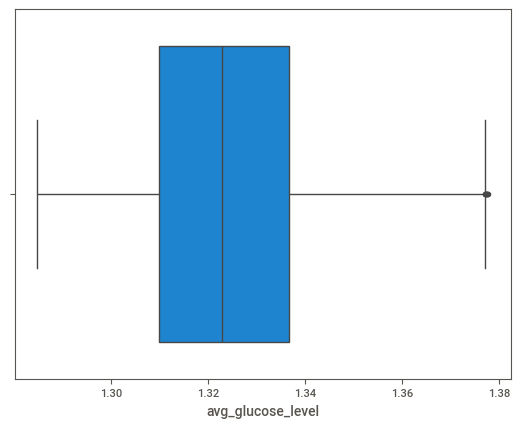

In [148]:
sns.boxplot(x='avg_glucose_level',data=data)

In [149]:
data.avg_glucose_level = np.sqrt(data.avg_glucose_level)

<Axes: xlabel='avg_glucose_level'>

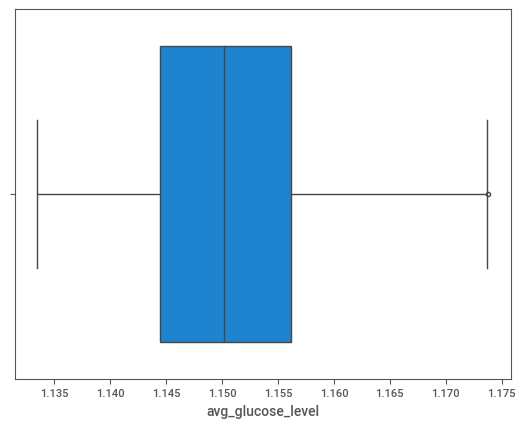

In [150]:
sns.boxplot(x='avg_glucose_level',data=data)

In [151]:
data.avg_glucose_level = np.sqrt(data.avg_glucose_level)

<Axes: xlabel='avg_glucose_level'>

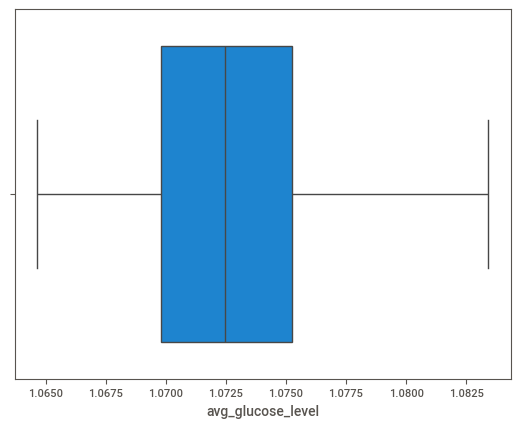

In [152]:
sns.boxplot(x='avg_glucose_level',data=data)

In [ ]:
# bmi column

<Axes: xlabel='bmi'>

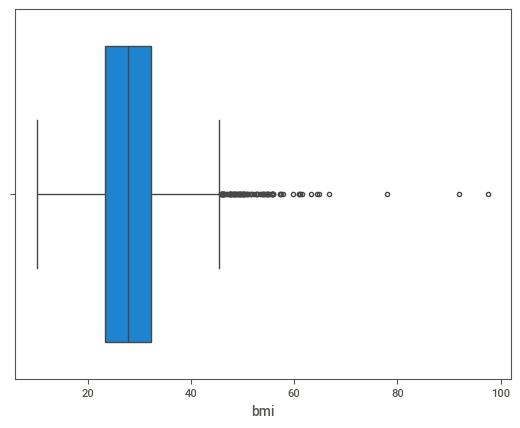

In [200]:
sns.boxplot(x='bmi',data=data)

In [202]:
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3-Q1
print("IQR:",IQR)

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Lower_Bound:",lower_bound)
print("Upper_Bound:",upper_bound)

IQR: 8.900000000000002
Lower_Bound: 9.949999999999998
Upper_Bound: 45.550000000000004


In [204]:
outlier = data[(data['bmi'] < lower_bound) | (data['bmi'] > upper_bound)]
num_outlier = len(outlier)
print(num_outlier)

100


In [206]:
data.drop(outlier.index,inplace=True)

In [208]:
outlier = data[(data['bmi'] < lower_bound) | (data['bmi'] > upper_bound)]
num_outlier = len(outlier)
print(num_outlier)

0


<Axes: xlabel='bmi'>

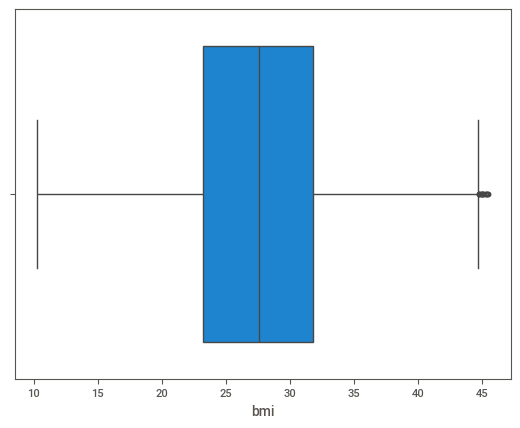

In [210]:
sns.boxplot(x='bmi',data=data)

In [212]:
data.bmi = np.sqrt(data.bmi)

<Axes: xlabel='bmi'>

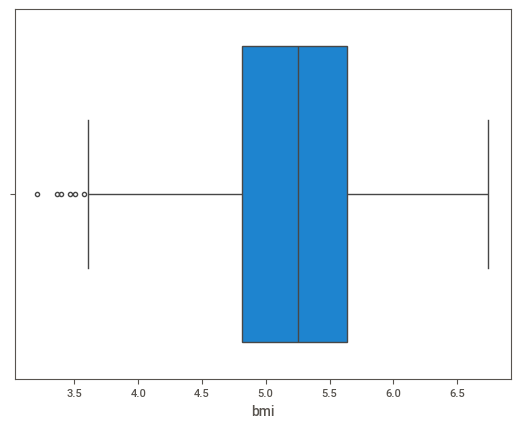

In [214]:
sns.boxplot(x='bmi',data=data)

In [216]:
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3-Q1
print("IQR:",IQR)

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Lower_Bound:",lower_bound)
print("Upper_Bound:",upper_bound)

IQR: 0.8225110404317553
Lower_Bound: 3.5828712708692856
Upper_Bound: 6.872915432596306


In [218]:
outlier = data[(data['bmi'] < lower_bound) | (data['bmi'] > upper_bound)]
num_outlier = len(outlier)
print(num_outlier)

6


In [220]:
data.drop(outlier.index,inplace=True)

<Axes: xlabel='bmi'>

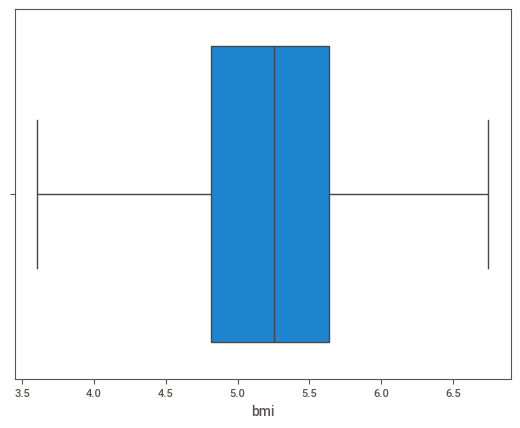

In [222]:
sns.boxplot(x='bmi',data=data)

In [ ]:
# Outliers from both the column has been removed.

### Feature Engineering
since the "Other" category in the gender column has only one value --> we can remove that 1 record


In [224]:
data['gender'].value_counts()

gender
Female    2580
Male      1796
Other        1
Name: count, dtype: int64

In [226]:
data = data[data['gender'] != 'Other']

In [228]:
data['gender'].value_counts()

gender
Female    2580
Male      1796
Name: count, dtype: int64

In [230]:
df1 = pd.get_dummies(data['gender'],prefix='gender',dtype=int,drop_first=True)
data = pd.concat([data,df1],axis=1).drop(['gender'],axis=1)

In [232]:
data.head()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male
2,31112,80.0,0,1,Yes,Private,Rural,1.075574,5.700877,never smoked,1,1
6,53882,74.0,1,1,Yes,Private,Rural,1.068657,5.234501,never smoked,1,1
7,10434,69.0,0,0,No,Private,Urban,1.073639,4.774935,never smoked,1,0
8,27419,59.0,0,0,Yes,Private,Rural,1.070043,5.300943,Unknown,1,0
9,60491,78.0,0,0,Yes,Private,Urban,1.065663,4.919350,Unknown,1,0


In [234]:
df1 = pd.get_dummies(data['ever_married'],prefix='ever_married',dtype=int,drop_first=True)
data = pd.concat([data,df1],axis=1).drop(['ever_married'],axis=1)

In [236]:
data['work_type'].value_counts()

work_type
Private          2474
children          671
Self-employed     658
Govt_job          551
Never_worked       22
Name: count, dtype: int64

In [238]:
df1 = pd.get_dummies(data['work_type'],prefix='work_type',dtype=int,drop_first=True)
data = pd.concat([data,df1],axis=1).drop(['work_type'],axis=1)

In [240]:
df1 = pd.get_dummies(data['Residence_type'],prefix='Residence_type',dtype=int,drop_first=True)
data = pd.concat([data,df1],axis=1).drop(['Residence_type'],axis=1)

In [242]:
data['smoking_status'].value_counts()

smoking_status
never smoked       1591
Unknown            1412
formerly smoked     706
smokes              667
Name: count, dtype: int64

In [244]:
df1 = pd.get_dummies(data['smoking_status'],prefix='smoking_status',dtype=int,drop_first=True)
data = pd.concat([data,df1],axis=1).drop(['smoking_status'],axis=1)

In [246]:
data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,31112,80.0,0,1,1.075574,5.700877,1,1,1,0,1,0,0,0,0,1,0
6,53882,74.0,1,1,1.068657,5.234501,1,1,1,0,1,0,0,0,0,1,0
7,10434,69.0,0,0,1.073639,4.774935,1,0,0,0,1,0,0,1,0,1,0
8,27419,59.0,0,0,1.070043,5.300943,1,0,1,0,1,0,0,0,0,0,0
9,60491,78.0,0,0,1.065663,4.919350,1,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,1.071634,5.300943,0,0,1,0,1,0,0,1,0,1,0
5106,44873,81.0,0,0,1.078388,6.324555,0,0,1,0,0,1,0,1,0,1,0
5107,19723,35.0,0,0,1.071482,5.531727,0,0,1,0,0,1,0,0,0,1,0
5108,37544,51.0,0,0,1.083181,5.059644,0,1,1,0,1,0,0,0,1,0,0


In [248]:
data.drop('id',axis=1,inplace=True)

In [250]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,80.0,0,1,1.075574,5.700877,1,1,1,0,1,0,0,0,0,1,0
6,74.0,1,1,1.068657,5.234501,1,1,1,0,1,0,0,0,0,1,0
7,69.0,0,0,1.073639,4.774935,1,0,0,0,1,0,0,1,0,1,0
8,59.0,0,0,1.070043,5.300943,1,0,1,0,1,0,0,0,0,0,0
9,78.0,0,0,1.065663,4.919350,1,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1.071634,5.300943,0,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,1.078388,6.324555,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,1.071482,5.531727,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,1.083181,5.059644,0,1,1,0,1,0,0,0,1,0,0


In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4376 entries, 2 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4376 non-null   float64
 1   hypertension                    4376 non-null   int64  
 2   heart_disease                   4376 non-null   int64  
 3   avg_glucose_level               4376 non-null   float64
 4   bmi                             4376 non-null   float64
 5   stroke                          4376 non-null   int64  
 6   gender_Male                     4376 non-null   int32  
 7   ever_married_Yes                4376 non-null   int32  
 8   work_type_Never_worked          4376 non-null   int32  
 9   work_type_Private               4376 non-null   int32  
 10  work_type_Self-employed         4376 non-null   int32  
 11  work_type_children              4376 non-null   int32  
 12  Residence_type_Urban            4376 no

In [254]:
# scaling - MinMaxScaler(0-1)

In [256]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000
mean,40.922770,0.074497,0.039305,1.072630,5.233186,0.037477,0.410420,0.623400,0.005027,0.565356,0.150366,0.153336,0.507541,0.161335,0.363574,0.152422
std,22.546185,0.262608,0.194343,0.003998,0.617856,0.189950,0.491966,0.484588,0.070734,0.495767,0.357470,0.360353,0.500000,0.367881,0.481083,0.359471
min,0.080000,0.000000,0.000000,1.064653,3.605551,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,1.069803,4.816638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,0.000000,0.000000,1.072469,5.253570,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,58.000000,0.000000,0.000000,1.075259,5.639149,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,1.083423,6.745369,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [258]:
scale = MinMaxScaler()
data[['age','avg_glucose_level','bmi']] = scale.fit_transform(data[['age','avg_glucose_level','bmi']])

In [260]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000
mean,0.498569,0.074497,0.039305,0.424994,0.518385,0.037477,0.410420,0.623400,0.005027,0.565356,0.150366,0.153336,0.507541,0.161335,0.363574,0.152422
std,0.275222,0.262608,0.194343,0.212979,0.196781,0.189950,0.491966,0.484588,0.070734,0.495767,0.357470,0.360353,0.500000,0.367881,0.481083,0.359471
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.279785,0.000000,0.000000,0.274409,0.385719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.511719,0.000000,0.000000,0.416443,0.524877,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.707031,0.000000,0.000000,0.565088,0.647680,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Selection
id column is already dropped - unwanted column. 
since there is no high correlation between input features so none of the column is dropped.

In [263]:
data.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.252250,0.239818,-0.022931,0.403977,0.227683,-0.047655,0.684581,-0.078012,0.142101,0.335779,-0.643610,0.011459,0.233317,0.127384,0.095987
hypertension,0.252250,1.000000,0.090408,0.000118,0.151159,0.113558,0.019820,0.150465,-0.020167,0.001218,0.102217,-0.120739,-0.009502,0.045911,0.055136,0.051599
heart_disease,0.239818,0.090408,1.000000,0.001087,0.060756,0.090115,0.089429,0.106245,-0.014378,-0.017179,0.099155,-0.082816,-0.012460,0.048756,-0.013531,0.051640
avg_glucose_level,-0.022931,0.000118,0.001087,1.000000,0.005183,-0.002019,0.029728,-0.002485,0.011371,0.005904,-0.017267,0.017173,-0.015141,-0.017542,-0.001288,0.005378
bmi,0.403977,0.151159,0.060756,0.005183,1.000000,0.033936,-0.001585,0.393279,-0.026000,0.239817,0.100619,-0.525676,0.010002,0.120114,0.135056,0.114150
stroke,0.227683,0.113558,0.090115,-0.002019,0.033936,1.000000,-0.003202,0.093771,-0.014026,0.000683,0.078568,-0.077295,0.009057,0.067189,-0.004067,0.003357
gender_Male,-0.047655,0.019820,0.089429,0.029728,-0.001585,-0.003202,1.000000,-0.046622,0.012945,-0.029408,-0.040365,0.102640,-0.003293,0.016725,-0.091726,0.019710
ever_married_Yes,0.684581,0.150465,0.106245,-0.002485,0.393279,0.093771,-0.046622,1.000000,-0.091456,0.168123,0.200303,-0.547534,0.000404,0.178065,0.108017,0.118346
work_type_Never_worked,-0.078012,-0.020167,-0.014378,0.011371,-0.026000,-0.014026,0.012945,-0.091456,1.000000,-0.081070,-0.029904,-0.030251,0.024779,-0.031177,0.040311,-0.030144
work_type_Private,0.142101,0.001218,-0.017179,0.005904,0.239817,0.000683,-0.029408,0.168123,-0.081070,1.000000,-0.479792,-0.485358,-0.019970,0.033660,0.126999,0.107617


<Axes: >

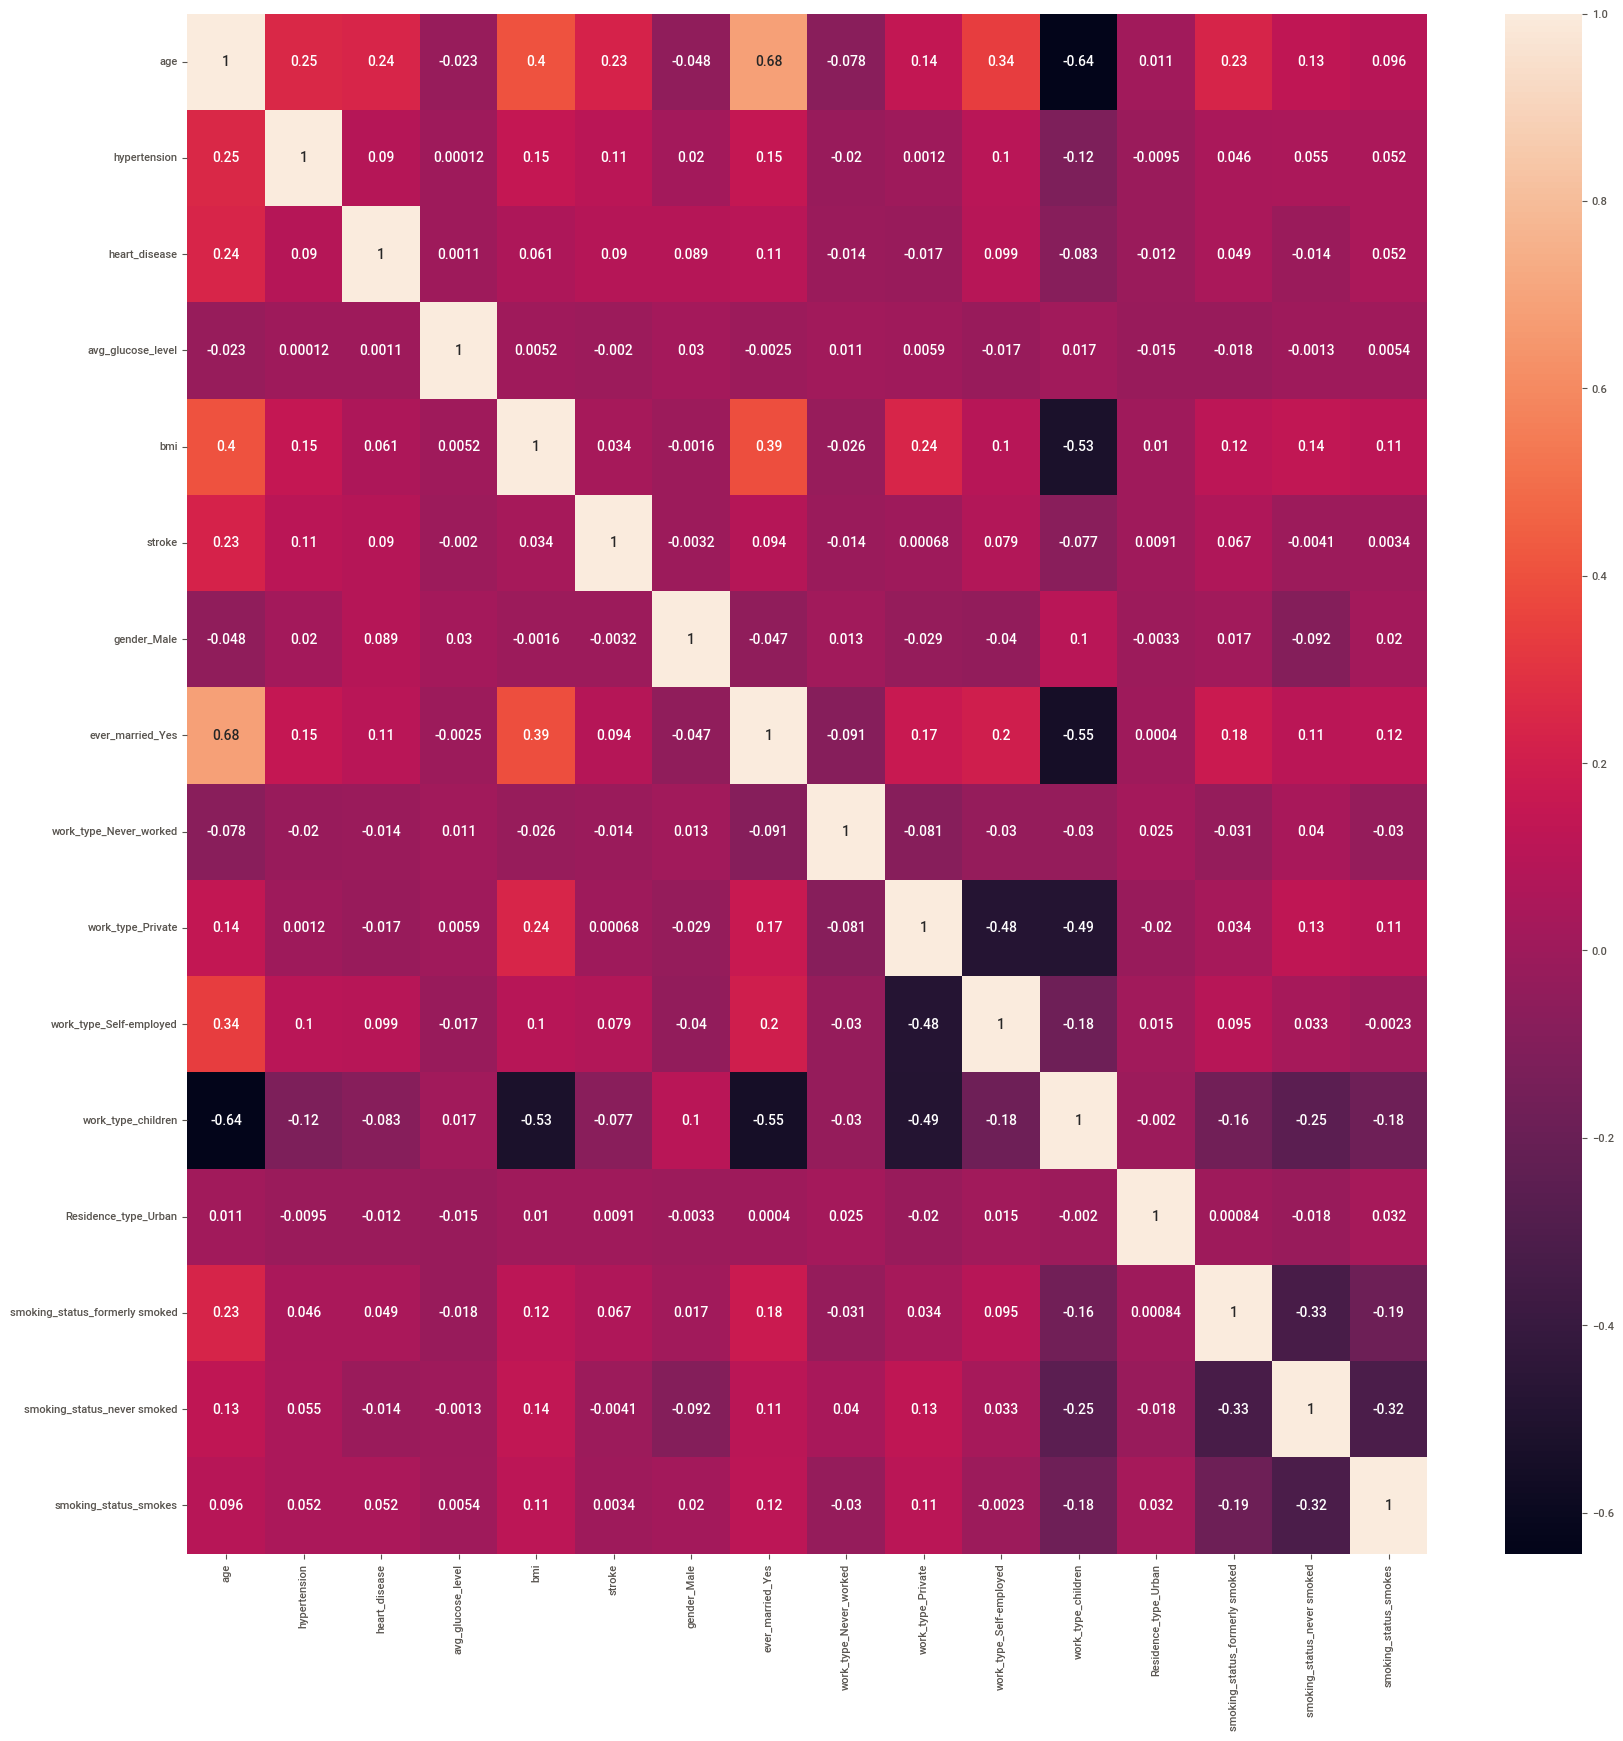

In [265]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

### splitting data into train and test

In [268]:
x = data.drop(columns='stroke',axis=1)
x

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,0.975586,0,1,0.581852,0.667340,1,1,0,1,0,0,0,0,1,0
6,0.902344,1,1,0.213343,0.518804,1,1,0,1,0,0,0,0,1,0
7,0.841309,0,0,0.478755,0.372437,0,0,0,1,0,0,1,0,1,0
8,0.719238,0,0,0.287161,0.539965,0,1,0,1,0,0,0,0,0,0
9,0.951172,0,0,0.053831,0.418431,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.975586,1,0,0.371963,0.539965,0,1,0,1,0,0,1,0,1,0
5106,0.987793,0,0,0.731778,0.865975,0,1,0,0,1,0,1,0,1,0
5107,0.426270,0,0,0.363831,0.613467,0,1,0,0,1,0,0,0,1,0
5108,0.621582,0,0,0.987131,0.463114,1,1,0,1,0,0,0,1,0,0


In [270]:
y = data.stroke
y

2       1
6       1
7       1
8       1
9       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4376, dtype: int64

In [272]:
#from sklearn.preprocessing import StandardScaler
#scale = StandardScaler()
#x_scaled = scale.fit_transform(x)

In [274]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000
mean,0.498569,0.074497,0.039305,0.424994,0.518385,0.037477,0.410420,0.623400,0.005027,0.565356,0.150366,0.153336,0.507541,0.161335,0.363574,0.152422
std,0.275222,0.262608,0.194343,0.212979,0.196781,0.189950,0.491966,0.484588,0.070734,0.495767,0.357470,0.360353,0.500000,0.367881,0.481083,0.359471
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.279785,0.000000,0.000000,0.274409,0.385719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.511719,0.000000,0.000000,0.416443,0.524877,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.707031,0.000000,0.000000,0.565088,0.647680,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [276]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [278]:
X_train.shape

(3282, 15)

In [280]:
X_test.shape

(1094, 15)

In [282]:
# checking algorithm score before balancing

In [284]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [286]:
y_pred = lr.predict(X_test)

In [288]:
print('Accuracy score:',accuracy_score(y_test,y_pred))

Accuracy score: 0.9570383912248629


In [290]:
print(f1_score(y_test,y_pred))

0.0


In [292]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1047
           1       0.00      0.00      0.00        47

    accuracy                           0.96      1094
   macro avg       0.48      0.50      0.49      1094
weighted avg       0.92      0.96      0.94      1094



In [294]:
data.stroke.value_counts()

stroke
0    4212
1     164
Name: count, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

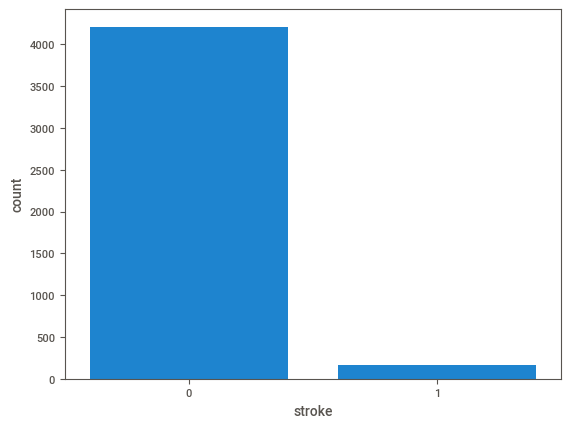

In [296]:
sns.countplot(x='stroke',data=data)

In [298]:
# since data is highly imbalanced (0-95% & 1-5%) so we have to balance the data by using SMOTE function

In [300]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [301]:
from collections import Counter
print("Actual values:",Counter(y_train))
print("Balanced values:",Counter(y_train_smote))

Actual values: Counter({0: 3165, 1: 117})
Balanced values: Counter({0: 3165, 1: 3165})


## Logistic Regression 

In [305]:
LR = LogisticRegression()
LR.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [307]:
y_pred = LR.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [309]:
print('Accuracy score:',accuracy_score(y_test,y_pred))

Accuracy score: 0.7696526508226691


In [311]:
print(f1_score(y_test,y_pred))

0.20253164556962025


In [313]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.77      0.87      1047
           1       0.12      0.68      0.20        47

    accuracy                           0.77      1094
   macro avg       0.55      0.73      0.53      1094
weighted avg       0.94      0.77      0.84      1094



### Support Vector Machine (SVM)

In [316]:
svm = SVC()
svm.fit(X_train_smote,y_train_smote)

SVC()

In [317]:
y_pred = svm.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [318]:
print('Accuracy score:',accuracy_score(y_test,y_pred))

Accuracy score: 0.783363802559415


In [319]:
print(f1_score(y_test,y_pred))

0.1625441696113074


In [324]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      1047
           1       0.10      0.49      0.16        47

    accuracy                           0.78      1094
   macro avg       0.53      0.64      0.52      1094
weighted avg       0.93      0.78      0.84      1094



### KNN (K-Nearest Neighbors)

In [327]:
error_rate = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_smote,y_train_smote)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_test != y_pred))

In [328]:
error_rate

[0.13345521023765997,
 0.12340036563071298,
 0.16544789762340037,
 0.14716636197440586,
 0.17641681901279707,
 0.17276051188299818,
 0.19469835466179158,
 0.18921389396709323,
 0.2129798903107861,
 0.19926873857404023]

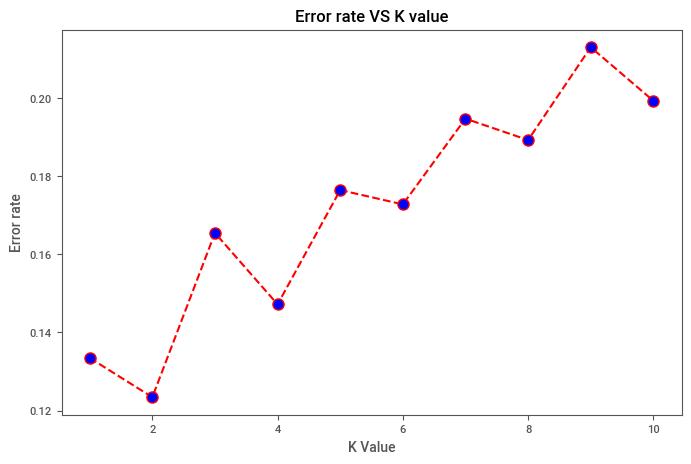

In [329]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11),error_rate,color='red',linestyle='dashed',
        marker='o',markersize=8,markerfacecolor='blue')
plt.title('Error rate VS K value')
plt.xlabel('K Value')
plt.ylabel('Error rate')
plt.show()

In [333]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train_smote,y_train_smote)

KNeighborsClassifier()

In [335]:
y_pred = knn1.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [336]:
print('Accuracy score:',accuracy_score(y_test,y_pred))

Accuracy score: 0.823583180987203


In [339]:
print(f1_score(y_test,y_pred))

0.18565400843881857


In [341]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1047
           1       0.12      0.47      0.19        47

    accuracy                           0.82      1094
   macro avg       0.54      0.65      0.54      1094
weighted avg       0.94      0.82      0.87      1094



### Decision Tree

In [344]:
dt = DecisionTreeClassifier()
dt.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier()

In [346]:
y_pred = dt.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [348]:
print('Accuracy score:',accuracy_score(y_test,y_pred))

Accuracy score: 0.8820840950639853


In [350]:
print(f1_score(y_test,y_pred))

0.1342281879194631


In [352]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1047
           1       0.10      0.21      0.13        47

    accuracy                           0.88      1094
   macro avg       0.53      0.56      0.54      1094
weighted avg       0.93      0.88      0.90      1094



In [354]:
print(confusion_matrix(y_test,y_pred))

[[955  92]
 [ 37  10]]


### Random Forest         # max depth = 5  accuracy = 75

In [357]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

In [358]:
y_pred = rf.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [359]:
print('Accuracy score:',accuracy_score(y_test,y_pred))

Accuracy score: 0.9040219378427788


In [360]:
print(f1_score(y_test,y_pred))

0.21052631578947367


In [365]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1047
           1       0.16      0.30      0.21        47

    accuracy                           0.90      1094
   macro avg       0.57      0.61      0.58      1094
weighted avg       0.93      0.90      0.92      1094



### Gradient Boosting

In [368]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_smote,y_train_smote)

GradientBoostingClassifier(random_state=42)

In [369]:
y_pred = gb.predict(X_test)

In [372]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [374]:
print('Accuracy score:',accuracy_score(y_test,y_pred))

Accuracy score: 0.8363802559414991


In [376]:
print(f1_score(y_test,y_pred))

0.2183406113537118


In [378]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1047
           1       0.14      0.53      0.22        47

    accuracy                           0.84      1094
   macro avg       0.56      0.69      0.56      1094
weighted avg       0.94      0.84      0.88      1094



### XGBoost (Extreme Gradient Boosting)

In [381]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [382]:
y_pred = xgb.predict(X_test)

In [383]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [387]:
print('Accuracy score:',accuracy_score(y_test,y_pred))

Accuracy score: 0.9314442413162706


In [389]:
print(f1_score(y_test,y_pred))

0.07407407407407407


In [391]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1047
           1       0.09      0.06      0.07        47

    accuracy                           0.93      1094
   macro avg       0.52      0.52      0.52      1094
weighted avg       0.92      0.93      0.93      1094



### Naive Bayes

In [394]:
from sklearn.naive_bayes import GaussianNB
nb1 = GaussianNB()
nb1.fit(X_train_smote,y_train_smote)

GaussianNB()

In [396]:
y_pred = nb1.predict(X_test)

In [398]:
print('Accuracy score:',accuracy_score(y_test,y_pred))

Accuracy score: 0.2513711151736746


In [400]:
print(f1_score(y_test,y_pred))

0.10295728368017525


In [402]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.22      0.36      1047
           1       0.05      1.00      0.10        47

    accuracy                           0.25      1094
   macro avg       0.53      0.61      0.23      1094
weighted avg       0.96      0.25      0.35      1094



### ANN

In [405]:
model = MLPClassifier(hidden_layer_sizes=(50,20),
                     learning_rate_init = 0.01,
                     max_iter=100,
                     random_state=42)
model.fit(X_train_smote,y_train_smote)

MLPClassifier(hidden_layer_sizes=(50, 20), learning_rate_init=0.01,
              max_iter=100, random_state=42)

In [406]:
y_pred = model.predict(X_test)

In [409]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [411]:
print('Accuracy score:',accuracy_score(y_test,y_pred))

Accuracy score: 0.8674588665447898


In [413]:
print(f1_score(y_test,y_pred))

0.18994413407821228


In [415]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1047
           1       0.13      0.36      0.19        47

    accuracy                           0.87      1094
   macro avg       0.55      0.63      0.56      1094
weighted avg       0.93      0.87      0.90      1094



### Hyperparameter Tuning

In [417]:
from sklearn.model_selection import GridSearchCV

In [419]:
param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [421]:
grid_search = GridSearchCV(estimator = xgb,param_grid=param,cv=5,scoring='f1',verbose=1)
grid_search.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=42, reg_alpha=0, reg_lambda=1, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=1)

In [423]:
print("Best Hyperparameter:",grid_search.best_params_)

Best Hyperparameter: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100}


In [425]:
best_model = grid_search.best_estimator_

In [427]:
y_pred = best_model.predict(X_test)

In [429]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [439]:
f1 = f1_score(y_test, y_pred)
print("Best F1 Score after tuning:", f1)

Best F1 Score after tuning: 0.09411764705882353


In [441]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1047
           1       0.11      0.09      0.09        47

    accuracy                           0.93      1094
   macro avg       0.53      0.53      0.53      1094
weighted avg       0.92      0.93      0.93      1094



In [443]:
print(confusion_matrix(y_test,y_pred))

[[1013   34]
 [  43    4]]
